# Run training scripts in cmd
and keep history


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [3]:
import os

In [4]:
pwd=!cd ../ && echo ${PWD}/
os.environ['DATA_DIR'] = pwd[0] + "input"

In [5]:
Detectron = "../detectron_source/"

In [6]:
def get_gt_bboxes_labels(image_id, annotations):
    selected_annotations = [a for a in gt_annotations if a['image_id'] == image_id]
    if len(selected_annotations) == 0:
        return []
    
    bboxes_labels = [(a['bbox'], str(a['category_id'])) for a in selected_annotations]
    return bboxes_labels

In [7]:
# !pip install --upgrade image-dataset-viz
from image_dataset_viz import render_datapoint, bbox_to_points, xywh_to_xyxy

In [8]:
def get_img_gt_target(img_path, image_id, annotations):
    img = Image.open(img_path + image_id + ".jpg")
    targets = [(bbox_to_points(xywh_to_xyxy(b)), l) for b, l in get_gt_bboxes_labels(image_id, gt_annotations)]
    return render_datapoint(img, targets, output_size=(430, 430))

## Check model overfitting on a few images

Display images

In [8]:
!ls ${DATA_DIR}/as_mscoco/train_overfit

000026e7ee790996.jpg  0002ab0af02e4a77.jpg  00045d609ca3f4eb.jpg
000062a39995e348.jpg  0002cc8afaf1b611.jpg  00068d5450f0358b.jpg
0000c64e1253d68f.jpg  0003d84e0165d630.jpg
000132c20b84269b.jpg  000411001ff7dd4f.jpg


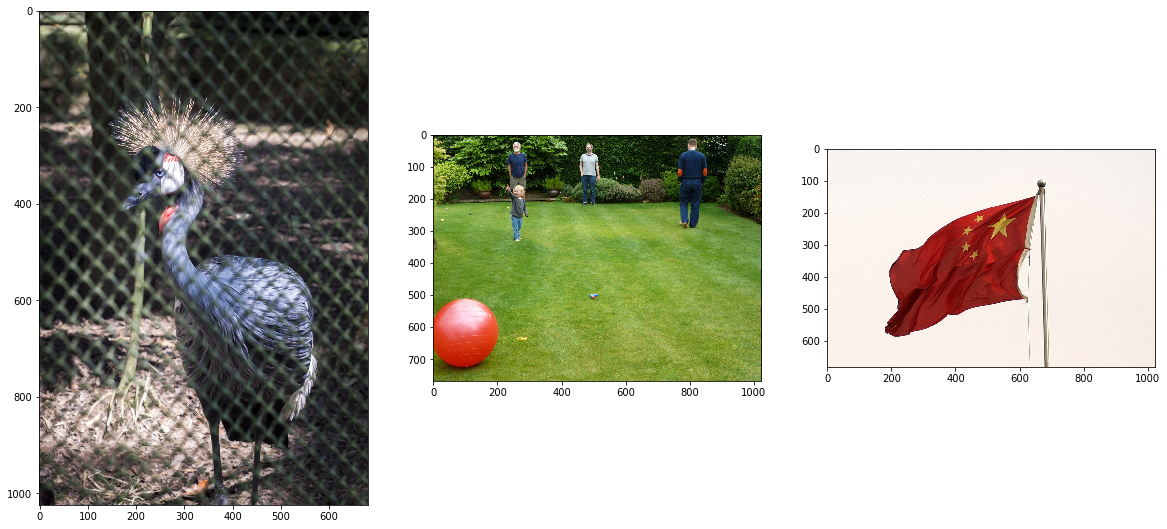

In [9]:
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline

path = os.environ['DATA_DIR'] + "/as_mscoco/train_overfit/"

plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(Image.open(path + "000062a39995e348.jpg"))

plt.subplot(132)
plt.imshow(Image.open(path + "0003d84e0165d630.jpg"))

plt.subplot(133)
plt.imshow(Image.open(path + "00068d5450f0358b.jpg"))

In [10]:
import json

gt_annotations = None
path = os.environ['DATA_DIR'] + "/as_mscoco/annotations/"

with open(path + "train_overfit.json", "r") as h:
    data = json.load(h)
    gt_annotations = data['annotations']

### Check 10 images overfitting - Faster-RCNN X

In [15]:
from datetime import datetime
now = datetime.now()

config_name = "check_faster_rcnn_X-101-64x4d-FPN_1x"
output_path = "/home/project/output/output-OpenImagesObjectDetections/{}/{}".format(config_name, now.strftime("%Y%m%d_%H%M"))
weights_path = "weights/Faster-RCNN-X-101-64x4d-FPN/model_final.pkl" 

config = "configs/open_images_v4/{}.yaml".format(config_name)
other_confs = "NUM_GPUS 2 " + \
                "OUTPUT_DIR {} ".format(output_path) + \
                "TRAIN.WEIGHTS {} ".format(weights_path) + \
                "TRAIN.IMS_PER_BATCH 2 " + \
                "TRAIN.SNAPSHOT_ITERS 100 " + \
                "SOLVER.MAX_ITER 300 " + \
                "SOLVER.BASE_LR 0.0085 " + \
                "SOLVER.WARM_UP_ITERS 10 " + \
                "DATA_LOADER.MINIBATCH_QUEUE_SIZE 10 " + \
                "DATA_LOADER.BLOBS_QUEUE_CAPACITY 8 " + \
                "DATA_LOADER.NUM_THREADS 4"

                
!mkdir -p {output_path}
!echo "python2 tools/train_net.py --cfg {config} {other_confs}" > {output_path}/run.cmd
!python2 {Detectron}/tools/train_net.py --cfg {config} {other_confs}

/usr/local/lib/python2.7/dist-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:169: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._traversal import breadth_first_order, depth_first_order, \
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:171: R

WARNING memonger.py:  70: NOTE: Executing memonger to optimize gradient memory
INFO memonger.py: 112: Memonger memory optimization took 0.0137078762054 secs
WARNING memonger.py:  70: NOTE: Executing memonger to optimize gradient memory
INFO memonger.py: 112: Memonger memory optimization took 0.0117390155792 secs
INFO train.py: 200: Loading dataset: ('open_images_v4_train_overfit',)
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
INFO roidb.py:  49: Appending horizontally-flipped training examples...
INFO roidb.py:  51: Loaded dataset: open_images_v4_train_overfit
INFO roidb.py: 135: Filtered 0 roidb entries: 20 -> 20
INFO roidb.py:  67: Computing bounding-box regression targets...
INFO roidb.py:  69: done
INFO train.py: 204: 20 roidb entries
INFO net.py:  59: Loading weights from: weights/Faster-RCNN-X-101-64x4d-FPN/model_final.pkl
INFO train.py: 188: Outputs saved to: /home/project/output/output-OpenImagesObjectDetections/check_faster_rcnn_X-101-64x4

INFO net.py: 257: res3_0_branch2b             : (2, 512, 100, 136)   => res3_0_branch2b             : (2, 512, 100, 136)   ------- (op: Relu)
INFO net.py: 257: res3_0_branch2b             : (2, 512, 100, 136)   => res3_0_branch2c             : (2, 512, 100, 136)   ------- (op: Conv)
INFO net.py: 257: res3_0_branch2c             : (2, 512, 100, 136)   => res3_0_branch2c_bn          : (2, 512, 100, 136)   ------- (op: AffineChannel)
INFO net.py: 257: res2_2_sum                  : (2, 256, 200, 272)   => res3_0_branch1              : (2, 512, 100, 136)   ------- (op: Conv)
INFO net.py: 257: res3_0_branch1              : (2, 512, 100, 136)   => res3_0_branch1_bn           : (2, 512, 100, 136)   ------- (op: AffineChannel)
INFO net.py: 257: res3_0_branch2c_bn          : (2, 512, 100, 136)   => res3_0_branch2c_bn          : (2, 512, 100, 136)   ------- (op: Sum)
INFO net.py: 257: res3_0_branch1_bn           : (2, 512, 100, 136)   => res3_0_branch2c_bn          : (2, 512, 100, 136)   ------|


INFO net.py: 257: res4_1_branch2c             : (2, 1024, 50, 68)    => res4_1_branch2c_bn          : (2, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_1_branch2c_bn          : (2, 1024, 50, 68)    => res4_1_branch2c_bn          : (2, 1024, 50, 68)    ------- (op: Sum)
INFO net.py: 257: res4_0_branch2c_bn          : (2, 1024, 50, 68)    => res4_1_branch2c_bn          : (2, 1024, 50, 68)    ------|
INFO net.py: 257: res4_1_branch2c_bn          : (2, 1024, 50, 68)    => res4_1_branch2c_bn          : (2, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_1_branch2c_bn          : (2, 1024, 50, 68)    => res4_2_branch2a             : (2, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_2_branch2a             : (2, 1024, 50, 68)    => res4_2_branch2a             : (2, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_2_branch2a             : (2, 1024, 50, 68)    => res4_2_branch2a             : (2, 1024, 50, 68)    ------- (op: Relu)


INFO net.py: 257: res4_7_branch2a             : (2, 1024, 50, 68)    => res4_7_branch2a             : (2, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_7_branch2a             : (2, 1024, 50, 68)    => res4_7_branch2b             : (2, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_7_branch2b             : (2, 1024, 50, 68)    => res4_7_branch2b             : (2, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_7_branch2b             : (2, 1024, 50, 68)    => res4_7_branch2b             : (2, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_7_branch2b             : (2, 1024, 50, 68)    => res4_7_branch2c             : (2, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_7_branch2c             : (2, 1024, 50, 68)    => res4_7_branch2c_bn          : (2, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_7_branch2c_bn          : (2, 1024, 50, 68)    => res4_7_branch2c_bn          : (2, 1024, 50, 68)    -------

INFO net.py: 257: res4_12_branch2c_bn         : (2, 1024, 50, 68)    => res4_12_branch2c_bn         : (2, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_12_branch2c_bn         : (2, 1024, 50, 68)    => res4_13_branch2a            : (2, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_13_branch2a            : (2, 1024, 50, 68)    => res4_13_branch2a            : (2, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_13_branch2a            : (2, 1024, 50, 68)    => res4_13_branch2a            : (2, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_13_branch2a            : (2, 1024, 50, 68)    => res4_13_branch2b            : (2, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_13_branch2b            : (2, 1024, 50, 68)    => res4_13_branch2b            : (2, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_13_branch2b            : (2, 1024, 50, 68)    => res4_13_branch2b            : (2, 1024, 50, 68)    -------

INFO net.py: 257: res4_18_branch2a            : (2, 1024, 50, 68)    => res4_18_branch2a            : (2, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_18_branch2a            : (2, 1024, 50, 68)    => res4_18_branch2b            : (2, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_18_branch2b            : (2, 1024, 50, 68)    => res4_18_branch2b            : (2, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_18_branch2b            : (2, 1024, 50, 68)    => res4_18_branch2b            : (2, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_18_branch2b            : (2, 1024, 50, 68)    => res4_18_branch2c            : (2, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_18_branch2c            : (2, 1024, 50, 68)    => res4_18_branch2c_bn         : (2, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_18_branch2c_bn         : (2, 1024, 50, 68)    => res4_18_branch2c_bn         : (2, 1024, 50, 68)    -------

INFO net.py: 257: res4_22_sum                 : (2, 1024, 50, 68)    => res5_0_branch1              : (2, 2048, 25, 34)    ------- (op: Conv)
INFO net.py: 257: res5_0_branch1              : (2, 2048, 25, 34)    => res5_0_branch1_bn           : (2, 2048, 25, 34)    ------- (op: AffineChannel)
INFO net.py: 257: res5_0_branch2c_bn          : (2, 2048, 25, 34)    => res5_0_branch2c_bn          : (2, 2048, 25, 34)    ------- (op: Sum)
INFO net.py: 257: res5_0_branch1_bn           : (2, 2048, 25, 34)    => res5_0_branch2c_bn          : (2, 2048, 25, 34)    ------|
INFO net.py: 257: res5_0_branch2c_bn          : (2, 2048, 25, 34)    => res5_0_branch2c_bn          : (2, 2048, 25, 34)    ------- (op: Relu)
INFO net.py: 257: res5_0_branch2c_bn          : (2, 2048, 25, 34)    => res5_1_branch2a             : (2, 2048, 25, 34)    ------- (op: Conv)
INFO net.py: 257: res5_1_branch2a             : (2, 2048, 25, 34)    => res5_1_branch2a             : (2, 2048, 25, 34)    ------- (op: AffineChannel)


INFO net.py: 257: conv_rpn_fpn3               : (2, 256, 100, 136)   => rpn_bbox_pred_fpn3          : (2, 12, 100, 136)    ------- (op: Conv)
INFO net.py: 257: rpn_cls_logits_fpn3         : (2, 3, 100, 136)     => rpn_cls_probs_fpn3          : (2, 3, 100, 136)     ------- (op: Sigmoid)
INFO net.py: 257: rpn_cls_probs_fpn3          : (2, 3, 100, 136)     => rpn_rois_fpn3               : (1512, 5)            ------- (op: Python:GenerateProposalsOp:gpu_0/rpn_cls_probs_fpn3,gpu_0/rpn_bbox_pred_fpn3,im_info)
INFO net.py: 257: rpn_bbox_pred_fpn3          : (2, 12, 100, 136)    => rpn_rois_fpn3               : (1512, 5)            ------|
INFO net.py: 257: im_info                     : (2, 3)               => rpn_rois_fpn3               : (1512, 5)            ------|
INFO net.py: 257: fpn_res4_22_sum             : (2, 256, 50, 68)     => conv_rpn_fpn4               : (2, 256, 50, 68)     ------- (op: Conv)
INFO net.py: 257: conv_rpn_fpn4               : (2, 256, 50, 68)     => conv_rpn_fpn4  

INFO net.py: 257: rpn_bbox_outside_weights_wide_fpn4: (2, 12, 84, 84)      => rpn_bbox_outside_weights_fpn4: (2, 12, 50, 68)      ------- (op: SpatialNarrowAs)
INFO net.py: 257: rpn_bbox_pred_fpn4          : (2, 12, 50, 68)      => rpn_bbox_outside_weights_fpn4: (2, 12, 50, 68)      ------|
INFO net.py: 257: rpn_cls_logits_fpn4         : (2, 3, 50, 68)       => loss_rpn_cls_fpn4           : ()                   ------- (op: SigmoidCrossEntropyLoss)
INFO net.py: 257: rpn_labels_int32_fpn4       : (2, 3, 50, 68)       => loss_rpn_cls_fpn4           : ()                   ------|
INFO net.py: 257: rpn_bbox_pred_fpn4          : (2, 12, 50, 68)      => loss_rpn_bbox_fpn4          : ()                   ------- (op: SmoothL1Loss)
INFO net.py: 257: rpn_bbox_targets_fpn4       : (2, 12, 50, 68)      => loss_rpn_bbox_fpn4          : ()                   ------|
INFO net.py: 257: rpn_bbox_inside_weights_fpn4: (2, 12, 50, 68)      => loss_rpn_bbox_fpn4          : ()                   ------|
INFO

INFO detector.py: 479: Changing learning rate 0.002833 -> 0.003400 at iter 1
INFO detector.py: 508: Scaling update history by 1.200000 (new lr / old lr)
INFO detector.py: 479: Changing learning rate 0.003400 -> 0.003967 at iter 2
INFO detector.py: 508: Scaling update history by 1.166667 (new lr / old lr)
INFO detector.py: 479: Changing learning rate 0.003967 -> 0.004533 at iter 3
INFO detector.py: 508: Scaling update history by 1.142857 (new lr / old lr)
INFO detector.py: 479: Changing learning rate 0.004533 -> 0.005100 at iter 4
INFO detector.py: 508: Scaling update history by 1.125000 (new lr / old lr)
INFO detector.py: 479: Changing learning rate 0.005100 -> 0.005667 at iter 5
INFO detector.py: 508: Scaling update history by 1.111111 (new lr / old lr)
json_stats: {"accuracy_cls": 0.903076, "eta": "0:13:43", "iter": 20, "loss": 1.886100, "loss_bbox": 0.213552, "loss_cls": 1.320924, "loss_rpn_bbox_fpn2": 0.002442, "loss_rpn_bbox_fpn3": 0.000880, "loss_rpn_bbox_fpn4": 0.013259, "loss_r

json_stats: {"accuracy_cls": 0.980225, "eta": "0:00:35", "iter": 280, "loss": 0.233975, "loss_bbox": 0.093677, "loss_cls": 0.055343, "loss_rpn_bbox_fpn2": 0.000170, "loss_rpn_bbox_fpn3": 0.000144, "loss_rpn_bbox_fpn4": 0.001960, "loss_rpn_bbox_fpn5": 0.001073, "loss_rpn_bbox_fpn6": 0.001363, "loss_rpn_cls_fpn2": 0.002306, "loss_rpn_cls_fpn3": 0.001039, "loss_rpn_cls_fpn4": 0.002774, "loss_rpn_cls_fpn5": 0.000924, "loss_rpn_cls_fpn6": 0.000717, "lr": 0.008500, "mb_qsize": 10, "mem": 9764, "time": 1.765826}
json_stats: {"accuracy_cls": 0.988281, "eta": "0:00:01", "iter": 299, "loss": 0.194303, "loss_bbox": 0.082296, "loss_cls": 0.040436, "loss_rpn_bbox_fpn2": 0.000158, "loss_rpn_bbox_fpn3": 0.000116, "loss_rpn_bbox_fpn4": 0.001501, "loss_rpn_bbox_fpn5": 0.000942, "loss_rpn_bbox_fpn6": 0.001321, "loss_rpn_cls_fpn2": 0.001306, "loss_rpn_cls_fpn3": 0.001508, "loss_rpn_cls_fpn4": 0.002868, "loss_rpn_cls_fpn5": 0.001192, "loss_rpn_cls_fpn6": 0.000789, "lr": 0.008500, "mb_qsize": 10, "mem": 97

INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: 83.8
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: 44.6
INFO json_dataset_evaluator.py: 231: 59.4
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dat

Run inference on train_overfitting dataset

In [16]:
inference_output_path = "{}/inference_on_train/".format(output_path)
other_confs = "--output-dir {} --image-ext jpg --output-ext png".format(inference_output_path)
input_path = os.environ['DATA_DIR'] + "/as_mscoco/train_overfit/"
weights_path = output_path + "/train/open_images_v4_train_overfit/generalized_rcnn/model_final.pkl"

!mkdir -p {inference_output_path}
!python2 {Detectron}/tools/infer_simple.py --cfg {config} {other_confs} --wts {weights_path} {input_path}

/usr/local/lib/python2.7/dist-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:169: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._traversal import breadth_first_order, depth_first_order, \
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:171: R

In [17]:
!ls {inference_output_path}

000026e7ee790996.jpg.png  0002ab0af02e4a77.jpg.png  00045d609ca3f4eb.jpg.png
000062a39995e348.jpg.png  0002cc8afaf1b611.jpg.png  00068d5450f0358b.jpg.png
0000c64e1253d68f.jpg.png  0003d84e0165d630.jpg.png
000132c20b84269b.jpg.png  000411001ff7dd4f.jpg.png


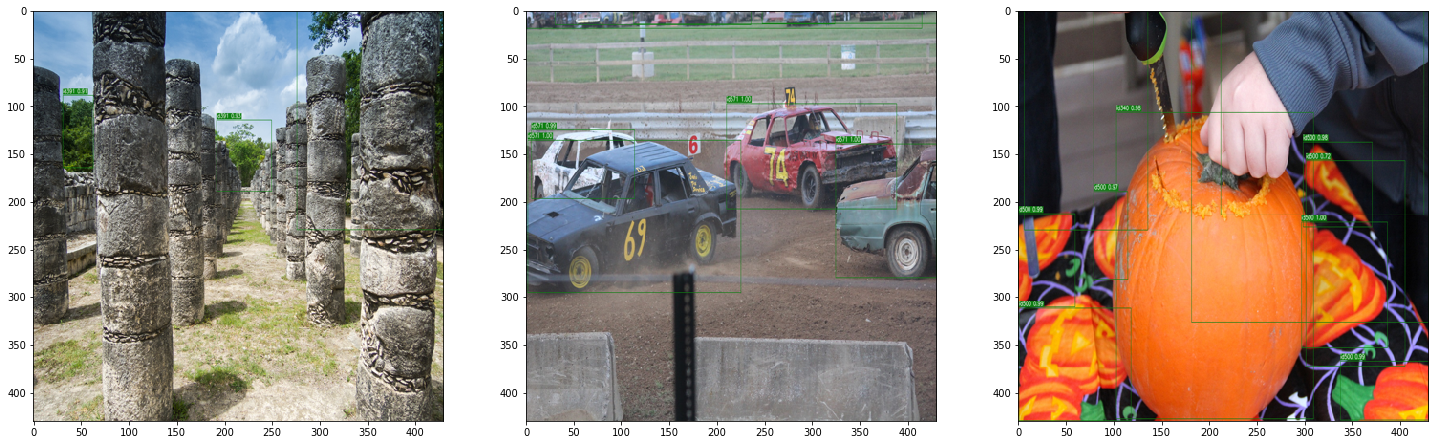

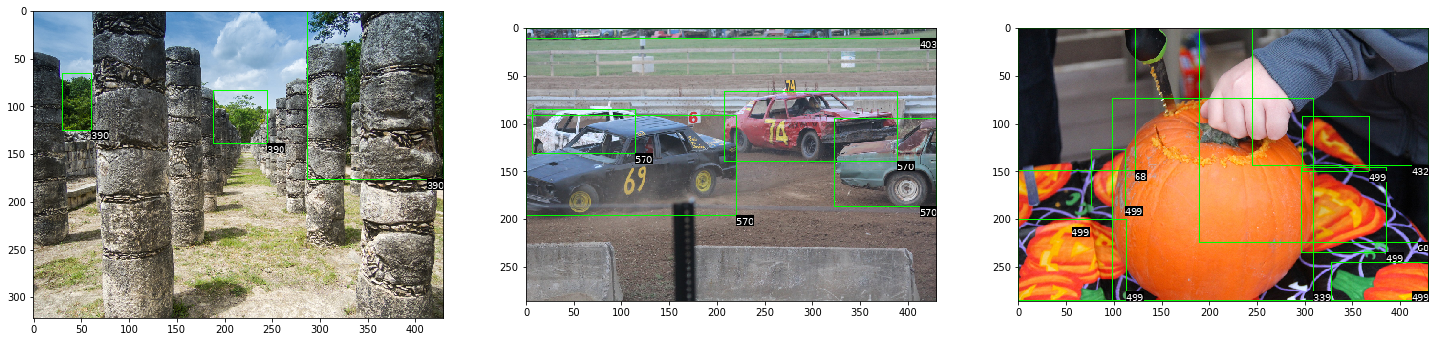

In [18]:
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline


plt.figure(figsize=(25, 10))
plt.subplot(131)
plt.imshow(Image.open(inference_output_path + "000026e7ee790996.jpg.png").resize((430, 430), Image.BICUBIC))

plt.subplot(132)
plt.imshow(Image.open(inference_output_path + "0000c64e1253d68f.jpg.png").resize((430, 430), Image.BICUBIC))

plt.subplot(133)
plt.imshow(Image.open(inference_output_path + "00045d609ca3f4eb.jpg.png").resize((430, 430), Image.BICUBIC))


img_path = os.environ['DATA_DIR'] + "/as_mscoco/train_overfit/"
plt.figure(figsize=(25, 10))
plt.subplot(131)
plt.imshow(get_img_gt_target(img_path, "000026e7ee790996", gt_annotations))

plt.subplot(132)
plt.imshow(get_img_gt_target(img_path, "0000c64e1253d68f", gt_annotations))

plt.subplot(133)
plt.imshow(get_img_gt_target(img_path, "00045d609ca3f4eb", gt_annotations))


## Train models

Training dataset contains: 162894 images

In [1]:
!find /home/data/as_mscoco/val/ -name *.jpg | wc -l
!find /home/data/as_mscoco/test/ -name *.jpg | wc -l

41620
125436


In [46]:
( 41620 * 0.9 + 125436 ) * 200 / 2

16289400.0

## Run training - Finetunning of Faster-RCNN

In [11]:
from datetime import datetime
now = datetime.now()


config_name = "faster_rcnn_X-101-64x4d-FPN_1x"
output_path = "/home/project/output/output-OpenImagesObjectDetections/{}/{}".format(config_name, now.strftime("%Y%m%d_%H%M"))
weights_path = "weights/Faster-RCNN-X-101-64x4d-FPN/model_final.pkl" 

config = "configs/open_images_v4/{}.yaml".format(config_name)
other_confs = "OUTPUT_DIR {} ".format(output_path) + \
                "TRAIN.WEIGHTS {} ".format(weights_path) + \
                "TRAIN.SNAPSHOT_ITERS 20000 " + \
                "TRAIN.IMS_PER_BATCH 2 " + \
                "SOLVER.BASE_LR 0.001 " + \
                "SOLVER.GAMMA 0.5 " + \
                "SOLVER.WARM_UP_ITERS 100 "

print("Output dir: ", output_path)                
!mkdir -p {output_path}
!echo "python2 tools/train_net.py --cfg {config} {other_confs}" > {output_path}/run.cmd
!python2 {Detectron}/tools/train_net.py --cfg {config} {other_confs}

('Output dir: ', '/home/project/output/output-OpenImagesObjectDetections/faster_rcnn_X-101-64x4d-FPN_1x/20180728_1805')
/usr/local/lib/python2.7/dist-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/usr/local/lib/python2.7/dist-packages/scipy/sparse/csgraph/__init__.py:169: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._traversal import 

WARNING memonger.py:  70: NOTE: Executing memonger to optimize gradient memory
INFO memonger.py: 112: Memonger memory optimization took 0.0109238624573 secs
WARNING memonger.py:  70: NOTE: Executing memonger to optimize gradient memory
INFO memonger.py: 112: Memonger memory optimization took 0.00915503501892 secs
INFO train.py: 200: Loading dataset: ('open_images_v4_train_small', 'open_images_v4_val_0.9')
loading annotations into memory...
Done (t=8.53s)
creating index...
index created!
INFO roidb.py:  49: Appending horizontally-flipped training examples...
INFO roidb.py:  51: Loaded dataset: open_images_v4_train_small
loading annotations into memory...
Done (t=4.48s)
creating index...
index created!
INFO roidb.py:  49: Appending horizontally-flipped training examples...
INFO roidb.py:  51: Loaded dataset: open_images_v4_val_0.9
INFO roidb.py: 135: Filtered 0 roidb entries: 280550 -> 280550
INFO roidb.py:  67: Computing bounding-box regression targets...
INFO roidb.py:  69: done
INFO t

INFO net.py: 257: res2_2_sum                  : (2, 256, 272, 200)   => res2_2_sum                  : (2, 256, 272, 200)   ------- (op: Relu)
INFO net.py: 257: res2_2_sum                  : (2, 256, 272, 200)   => res2_2_sum                  : (2, 256, 272, 200)   ------- (op: StopGradient)
INFO net.py: 257: res2_2_sum                  : (2, 256, 272, 200)   => res3_0_branch2a             : (2, 512, 272, 200)   ------- (op: Conv)
INFO net.py: 257: res3_0_branch2a             : (2, 512, 272, 200)   => res3_0_branch2a             : (2, 512, 272, 200)   ------- (op: AffineChannel)
INFO net.py: 257: res3_0_branch2a             : (2, 512, 272, 200)   => res3_0_branch2a             : (2, 512, 272, 200)   ------- (op: Relu)
INFO net.py: 257: res3_0_branch2a             : (2, 512, 272, 200)   => res3_0_branch2b             : (2, 512, 136, 100)   ------- (op: Conv)
INFO net.py: 257: res3_0_branch2b             : (2, 512, 136, 100)   => res3_0_branch2b             : (2, 512, 136, 100)   ------- 

INFO net.py: 257: res4_0_branch2c_bn          : (2, 1024, 68, 50)    => res4_0_branch2c_bn          : (2, 1024, 68, 50)    ------- (op: Sum)
INFO net.py: 257: res4_0_branch1_bn           : (2, 1024, 68, 50)    => res4_0_branch2c_bn          : (2, 1024, 68, 50)    ------|
INFO net.py: 257: res4_0_branch2c_bn          : (2, 1024, 68, 50)    => res4_0_branch2c_bn          : (2, 1024, 68, 50)    ------- (op: Relu)
INFO net.py: 257: res4_0_branch2c_bn          : (2, 1024, 68, 50)    => res4_1_branch2a             : (2, 1024, 68, 50)    ------- (op: Conv)
INFO net.py: 257: res4_1_branch2a             : (2, 1024, 68, 50)    => res4_1_branch2a             : (2, 1024, 68, 50)    ------- (op: AffineChannel)
INFO net.py: 257: res4_1_branch2a             : (2, 1024, 68, 50)    => res4_1_branch2a             : (2, 1024, 68, 50)    ------- (op: Relu)
INFO net.py: 257: res4_1_branch2a             : (2, 1024, 68, 50)    => res4_1_branch2b             : (2, 1024, 68, 50)    ------- (op: Conv)
INFO net.

INFO net.py: 257: res4_6_branch2a             : (2, 1024, 68, 50)    => res4_6_branch2a             : (2, 1024, 68, 50)    ------- (op: AffineChannel)
INFO net.py: 257: res4_6_branch2a             : (2, 1024, 68, 50)    => res4_6_branch2a             : (2, 1024, 68, 50)    ------- (op: Relu)
INFO net.py: 257: res4_6_branch2a             : (2, 1024, 68, 50)    => res4_6_branch2b             : (2, 1024, 68, 50)    ------- (op: Conv)
INFO net.py: 257: res4_6_branch2b             : (2, 1024, 68, 50)    => res4_6_branch2b             : (2, 1024, 68, 50)    ------- (op: AffineChannel)
INFO net.py: 257: res4_6_branch2b             : (2, 1024, 68, 50)    => res4_6_branch2b             : (2, 1024, 68, 50)    ------- (op: Relu)
INFO net.py: 257: res4_6_branch2b             : (2, 1024, 68, 50)    => res4_6_branch2c             : (2, 1024, 68, 50)    ------- (op: Conv)
INFO net.py: 257: res4_6_branch2c             : (2, 1024, 68, 50)    => res4_6_branch2c_bn          : (2, 1024, 68, 50)    -------

INFO net.py: 257: res4_11_branch2b            : (2, 1024, 68, 50)    => res4_11_branch2c            : (2, 1024, 68, 50)    ------- (op: Conv)
INFO net.py: 257: res4_11_branch2c            : (2, 1024, 68, 50)    => res4_11_branch2c_bn         : (2, 1024, 68, 50)    ------- (op: AffineChannel)
INFO net.py: 257: res4_11_branch2c_bn         : (2, 1024, 68, 50)    => res4_11_branch2c_bn         : (2, 1024, 68, 50)    ------- (op: Sum)
INFO net.py: 257: res4_10_branch2c_bn         : (2, 1024, 68, 50)    => res4_11_branch2c_bn         : (2, 1024, 68, 50)    ------|
INFO net.py: 257: res4_11_branch2c_bn         : (2, 1024, 68, 50)    => res4_11_branch2c_bn         : (2, 1024, 68, 50)    ------- (op: Relu)
INFO net.py: 257: res4_11_branch2c_bn         : (2, 1024, 68, 50)    => res4_12_branch2a            : (2, 1024, 68, 50)    ------- (op: Conv)
INFO net.py: 257: res4_12_branch2a            : (2, 1024, 68, 50)    => res4_12_branch2a            : (2, 1024, 68, 50)    ------- (op: AffineChannel)


INFO net.py: 257: res4_16_branch2c_bn         : (2, 1024, 68, 50)    => res4_17_branch2a            : (2, 1024, 68, 50)    ------- (op: Conv)
INFO net.py: 257: res4_17_branch2a            : (2, 1024, 68, 50)    => res4_17_branch2a            : (2, 1024, 68, 50)    ------- (op: AffineChannel)
INFO net.py: 257: res4_17_branch2a            : (2, 1024, 68, 50)    => res4_17_branch2a            : (2, 1024, 68, 50)    ------- (op: Relu)
INFO net.py: 257: res4_17_branch2a            : (2, 1024, 68, 50)    => res4_17_branch2b            : (2, 1024, 68, 50)    ------- (op: Conv)
INFO net.py: 257: res4_17_branch2b            : (2, 1024, 68, 50)    => res4_17_branch2b            : (2, 1024, 68, 50)    ------- (op: AffineChannel)
INFO net.py: 257: res4_17_branch2b            : (2, 1024, 68, 50)    => res4_17_branch2b            : (2, 1024, 68, 50)    ------- (op: Relu)
INFO net.py: 257: res4_17_branch2b            : (2, 1024, 68, 50)    => res4_17_branch2c            : (2, 1024, 68, 50)    -------

INFO net.py: 257: res4_22_branch2a            : (2, 1024, 68, 50)    => res4_22_branch2b            : (2, 1024, 68, 50)    ------- (op: Conv)
INFO net.py: 257: res4_22_branch2b            : (2, 1024, 68, 50)    => res4_22_branch2b            : (2, 1024, 68, 50)    ------- (op: AffineChannel)
INFO net.py: 257: res4_22_branch2b            : (2, 1024, 68, 50)    => res4_22_branch2b            : (2, 1024, 68, 50)    ------- (op: Relu)
INFO net.py: 257: res4_22_branch2b            : (2, 1024, 68, 50)    => res4_22_branch2c            : (2, 1024, 68, 50)    ------- (op: Conv)
INFO net.py: 257: res4_22_branch2c            : (2, 1024, 68, 50)    => res4_22_branch2c_bn         : (2, 1024, 68, 50)    ------- (op: AffineChannel)
INFO net.py: 257: res4_22_branch2c_bn         : (2, 1024, 68, 50)    => res4_22_sum                 : (2, 1024, 68, 50)    ------- (op: Sum)
INFO net.py: 257: res4_21_branch2c_bn         : (2, 1024, 68, 50)    => res4_22_sum                 : (2, 1024, 68, 50)    ------|


INFO net.py: 257: fpn_inner_res2_2_sum        : (2, 256, 272, 200)   => fpn_res2_2_sum              : (2, 256, 272, 200)   ------- (op: Conv)
INFO net.py: 257: fpn_res5_2_sum              : (2, 256, 34, 25)     => fpn_res5_2_sum_subsampled_2x: (2, 256, 17, 13)     ------- (op: MaxPool)
INFO net.py: 257: fpn_res5_2_sum_subsampled_2x: (2, 256, 17, 13)     => fpn_res5_2_sum_subsampled_2x: (2, 256, 17, 13)     ------- (op: StopGradient)
INFO net.py: 257: fpn_res5_2_sum              : (2, 256, 34, 25)     => fpn_res5_2_sum              : (2, 256, 34, 25)     ------- (op: StopGradient)
INFO net.py: 257: fpn_res4_22_sum             : (2, 256, 68, 50)     => fpn_res4_22_sum             : (2, 256, 68, 50)     ------- (op: StopGradient)
INFO net.py: 257: fpn_res3_3_sum              : (2, 256, 136, 100)   => fpn_res3_3_sum              : (2, 256, 136, 100)   ------- (op: StopGradient)
INFO net.py: 257: fpn_res2_2_sum              : (2, 256, 272, 200)   => fpn_res2_2_sum              : (2, 256, 27

INFO net.py: 257: rpn_bbox_targets_wide_fpn4  : (2, 12, 84, 84)      => rpn_bbox_targets_fpn4       : (2, 12, 68, 50)      ------- (op: SpatialNarrowAs)
INFO net.py: 257: rpn_bbox_pred_fpn4          : (2, 12, 68, 50)      => rpn_bbox_targets_fpn4       : (2, 12, 68, 50)      ------|
INFO net.py: 257: rpn_bbox_inside_weights_wide_fpn4: (2, 12, 84, 84)      => rpn_bbox_inside_weights_fpn4: (2, 12, 68, 50)      ------- (op: SpatialNarrowAs)
INFO net.py: 257: rpn_bbox_pred_fpn4          : (2, 12, 68, 50)      => rpn_bbox_inside_weights_fpn4: (2, 12, 68, 50)      ------|
INFO net.py: 257: rpn_bbox_outside_weights_wide_fpn4: (2, 12, 84, 84)      => rpn_bbox_outside_weights_fpn4: (2, 12, 68, 50)      ------- (op: SpatialNarrowAs)
INFO net.py: 257: rpn_bbox_pred_fpn4          : (2, 12, 68, 50)      => rpn_bbox_outside_weights_fpn4: (2, 12, 68, 50)      ------|
INFO net.py: 257: rpn_cls_logits_fpn4         : (2, 3, 68, 50)       => loss_rpn_cls_fpn4           : ()                   ------- (op:

json_stats: {"accuracy_cls": 0.893555, "eta": "1 day, 17:05:51", "iter": 20, "loss": 3.924096, "loss_bbox": 0.180227, "loss_cls": 3.491063, "loss_rpn_bbox_fpn2": 0.002306, "loss_rpn_bbox_fpn3": 0.003554, "loss_rpn_bbox_fpn4": 0.002242, "loss_rpn_bbox_fpn5": 0.004225, "loss_rpn_bbox_fpn6": 0.032125, "loss_rpn_cls_fpn2": 0.083893, "loss_rpn_cls_fpn3": 0.038444, "loss_rpn_cls_fpn4": 0.035733, "loss_rpn_cls_fpn5": 0.015005, "loss_rpn_cls_fpn6": 0.005861, "lr": 0.000467, "mb_qsize": 64, "mem": 10597, "time": 2.466677}
json_stats: {"accuracy_cls": 0.918457, "eta": "1 day, 6:03:36", "iter": 40, "loss": 1.298944, "loss_bbox": 0.174891, "loss_cls": 0.729510, "loss_rpn_bbox_fpn2": 0.003121, "loss_rpn_bbox_fpn3": 0.004529, "loss_rpn_bbox_fpn4": 0.002465, "loss_rpn_bbox_fpn5": 0.003945, "loss_rpn_bbox_fpn6": 0.017029, "loss_rpn_cls_fpn2": 0.035658, "loss_rpn_cls_fpn3": 0.056527, "loss_rpn_cls_fpn4": 0.013290, "loss_rpn_cls_fpn5": 0.014185, "loss_rpn_cls_fpn6": 0.000561, "lr": 0.000600, "mb_qsize":